In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
import time
import gc

import nibabel as nib

from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader

import torchvision.transforms as transforms

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

print("Random seed set.")

Random seed set.


In [2]:
def str2arr(input_string):
    return np.array(list(map(np.float32, input_string.split())))

In [3]:
loss_filter = str2arr("""0.04154781218780973
0.03346092053636961
0.02984256290133808
0.027535208298700986
0.026221503215431645""")
loss_3d = str2arr("""0.1366814433018098
0.04908351839293499
0.04803833677055868
0.04841044220972705
0.049385700062722776""")
loss_res = str2arr("""0.04841062728947328
0.032318672610062556
0.029056892885624633
0.026994401751366165
0.02568422261882782""")
loss_unet_big = str2arr("""0.04726752118852276
0.03146061282722162
0.02832907700113353
0.026679587014266974
0.0254085939694717""")
loss_unet = str2arr("""0.08456950147799053
0.04960683627431835
0.0488594708051793
0.04650862699947678
0.044253290431847524""")

Text(0.5, 1.0, 'Training Loss vs Epoch')

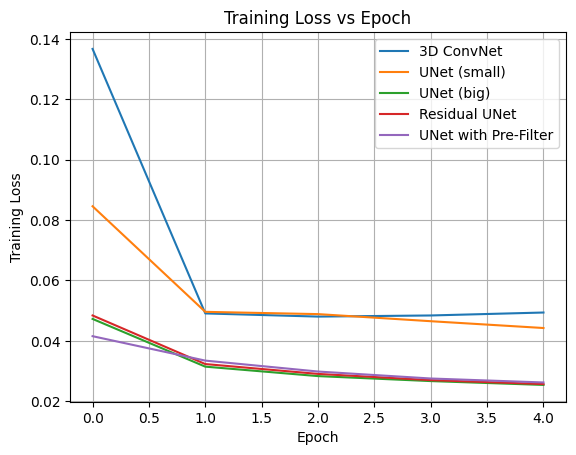

In [4]:
plt.plot(loss_3d, label="3D ConvNet")
plt.plot(loss_unet, label="UNet (small)")
plt.plot(loss_unet_big, label="UNet (big)")
plt.plot(loss_res, label="Residual UNet")
plt.plot(loss_filter, label="UNet with Pre-Filter")
plt.grid(True)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Epoch')

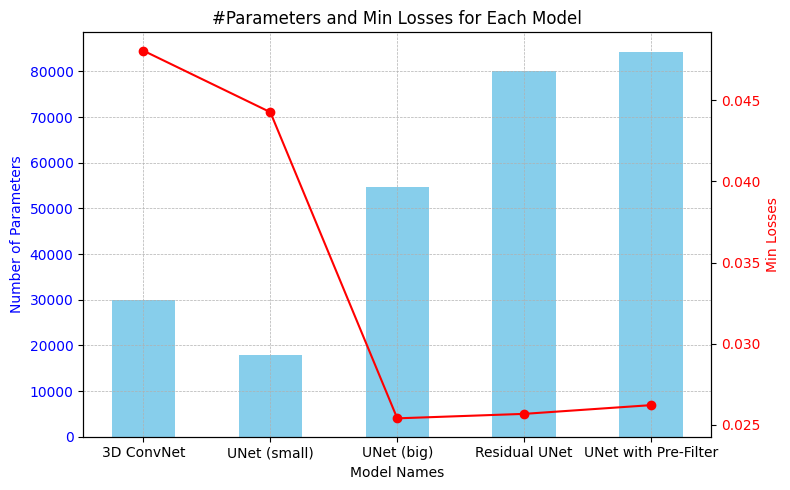

In [5]:
model_names = ['3D ConvNet', 'UNet (small)', 'UNet (big)', 'Residual UNet', 'UNet with Pre-Filter']
num_parameters = [29876, 17988, 54724, 80020, 84328]
min_losses = [min(loss_3d), min(loss_unet), min(loss_unet_big), min(loss_res), min(loss_filter)]

fig, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(model_names, num_parameters, width=0.5, color='skyblue', label='Number of Parameters')
ax1.set_xlabel('Model Names')
ax1.set_ylabel('Number of Parameters', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('#Parameters and Min Losses for Each Model')

# Create a second y-axis for minimum losses
ax2 = ax1.twinx()
ax2.plot(model_names, min_losses, color='red', marker='o', label='Min Losses')
ax2.set_ylabel('Min Losses', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a grid for the first axis
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
fig.tight_layout()